In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#get the data
df = web.DataReader('GOOG', data_source='yahoo', start='2012-01-01', end='2021-02-25')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-19,2130.530029,2097.409912,2119.270020,2101.139893,1457400.0,2101.139893
2021-02-22,2091.419922,2062.139893,2067.000000,2064.879883,1367500.0,2064.879883
2021-02-23,2082.010010,2002.020020,2025.010010,2070.860107,1667400.0,2070.860107
2021-02-24,2100.780029,2038.130005,2041.829956,2095.169922,1248300.0,2095.169922
2021-02-25,2094.879883,2021.290039,2067.449951,2031.359985,1828400.0,2031.359985


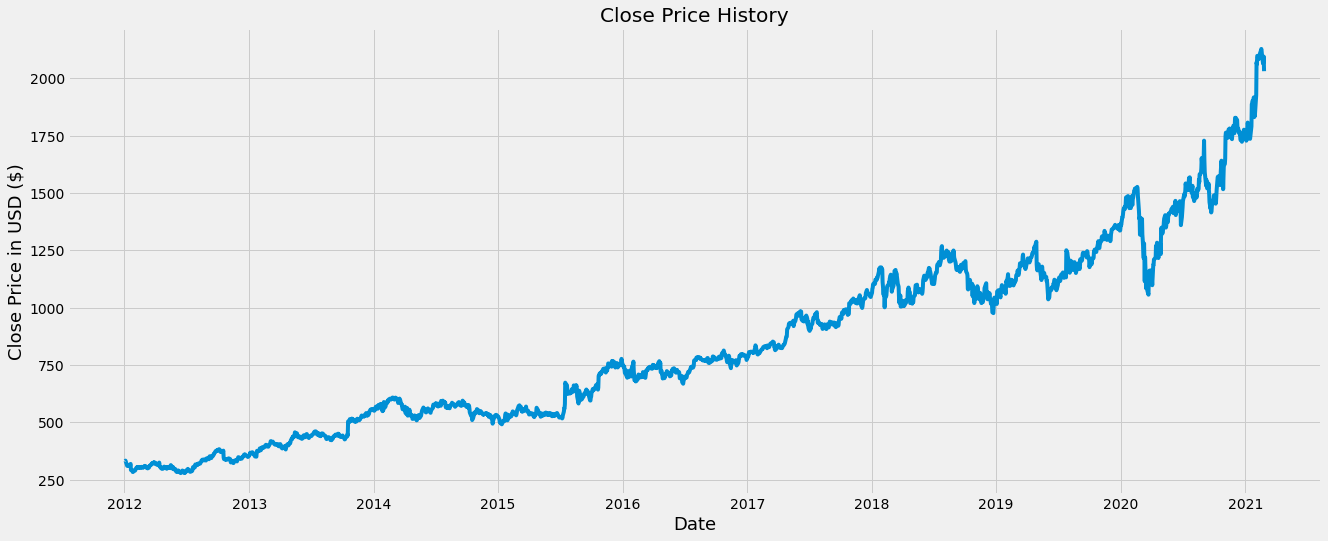

In [4]:
#visualize the closing price
plt.figure(figsize=(20,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize = 18)
plt.show()

In [5]:
#create a new data frame with only close price column
data = df.filter(['Close'])
#Convert the dataframe to numpy
dataset = data.values
#number of row to traing the dataset
training_data_len = math.ceil(len (dataset) * 0.8)
training_data_len

1842

In [6]:
#sacle the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(2302, 1)

In [7]:
#create the scaled dataset
#traing dataset
train_data = scaled_data[0:training_data_len, :]
train_data.shape
#splite the data into x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])



In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)


x_train

array([[0.02864125, 0.02941411, 0.02691782, ..., 0.02431113, 0.02368909,
        0.02604265],
       [0.02941411, 0.02691782, 0.02449694, ..., 0.02368909, 0.02604265,
        0.02406339],
       [0.02691782, 0.02449694, 0.01707542, ..., 0.02604265, 0.02406339,
        0.02213262],
       ...,
       [0.43819128, 0.45295477, 0.44991666, ..., 0.53305951, 0.52843743,
        0.53246481],
       [0.45295477, 0.44991666, 0.4618367 , ..., 0.52843743, 0.53246481,
        0.53718422],
       [0.44991666, 0.4618367 , 0.46896706, ..., 0.53246481, 0.53718422,
        0.54550926]])

In [9]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1782, 60, 1)

In [10]:
#bulid the LSTM model
model = Sequential()
model.add((LSTM(50,return_sequences=True , input_shape = (x_train.shape[1], 1))))
model.add((LSTM(50,return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#complie the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1782/1782 [==============================] - 43s 22ms/step - loss: 0.0020


In [13]:
#testing data set
test_data = scaled_data[training_data_len-60:, :]
x_test= []
y_test= dataset[training_data_len: , :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i , 0])

In [14]:
x_test= np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
pred = model.predict(x_test)

pred = scaler.inverse_transform(pred.reshape(-1,1))

In [17]:
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

2.497209631878397

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

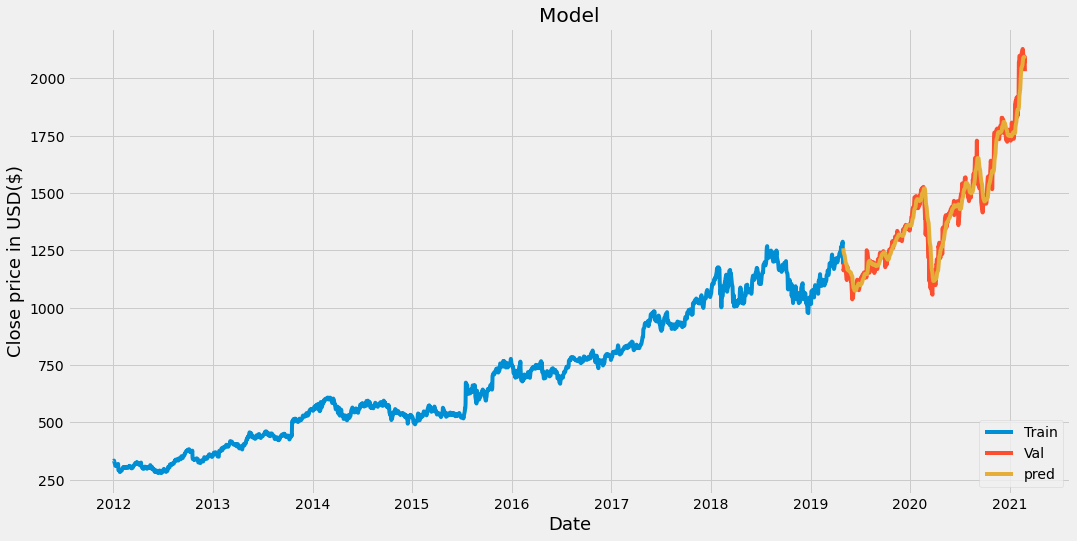

In [18]:
#plote
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['pred'] = pred

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price in USD($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train', 'Val', 'pred'], loc = 'lower right')
plt.show

In [19]:
apple_qoute = web.DataReader('GOOG', data_source='yahoo', start='2012-01-01', end= '2021-02-24')

def one_day():
  new_df = apple_qoute.filter(['Close'])
  last_60_days = new_df[-60:].values
  last_60_days_scaled = scaler.transform(last_60_days)
  X_test = []
  X_test.append(last_60_days_scaled)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test , (X_test.shape[0], X_test.shape[1],1))
  pred_price = model.predict(X_test)
  pred_price = scaler.inverse_transform(pred_price)

  return pred_price
    


In [20]:
print(one_day())

[[2086.6377]]


In [21]:
apple_qoute2 = web.DataReader('GOOG', data_source='yahoo', start='2021-02-24')
print(apple_qoute2['Close'])

Date
2021-02-24    2095.169922
2021-02-25    2031.359985
2021-02-26    2036.859985
2021-03-01    2081.510010
2021-03-02    2075.840088
Name: Close, dtype: float64
